In [4]:
import numpy as np

dictionary = {"tipo":[], "colore":[], "n_arti":[], "peso":[], "altezza":[], "larghezza":[]}

file = open("marziani.csv").readlines()

for row in file[1:]:
    row = row[:-1].split(',')

    if row[0] != '' and row[1] != '' and row[2] != '' and row[3] != '' and row[4] != '' and row[5] != '': 
        dictionary['tipo'].append(row[0])
        dictionary['colore'].append(row[1])
        dictionary['n_arti'].append(row[2])
        dictionary['peso'].append(float(row[3]))
        dictionary['altezza'].append(float(row[4]))
        dictionary['larghezza'].append(float(row[5]))

for key in dictionary:
    dictionary[key] = np.array(dictionary[key])
    
print(dictionary)

{'tipo': array(['Robby', 'Robby', 'Robby', ..., 'Simmy', 'Simmy', 'Simmy'],
      dtype='<U5'), 'colore': array(['viola', 'viola', 'viola', ..., 'viola', 'rosso', 'viola'],
      dtype='<U5'), 'n_arti': array(['20.0', '27.0', '25.0', ..., '22.0', '27.0', '23.0'], dtype='<U4'), 'peso': array([3.87, 3.15, 4.35, ..., 4.55, 4.53, 5.1 ]), 'altezza': array([14.77, 28.19, 12.05, ..., 29.41, 33.12, 18.88]), 'larghezza': array([73.22, 88.44, 76.74, ..., 68.38, 68.1 , 64.9 ])}


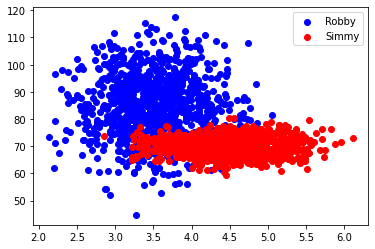

In [5]:
from matplotlib import pyplot
import matplotlib.pyplot as pl

_, ax = pl.subplots()

ax.scatter(dictionary['peso'][dictionary['tipo'] == 'Robby'],
          dictionary['larghezza'][dictionary['tipo'] == 'Robby'], 
          label = 'Robby', c='b')

ax.scatter(dictionary['peso'][dictionary['tipo'] == 'Simmy'],
          dictionary['larghezza'][dictionary['tipo'] == 'Simmy'], 
          label = 'Simmy', c='r')

ax.legend()
pl.show()

# Marziani, grafici multipli

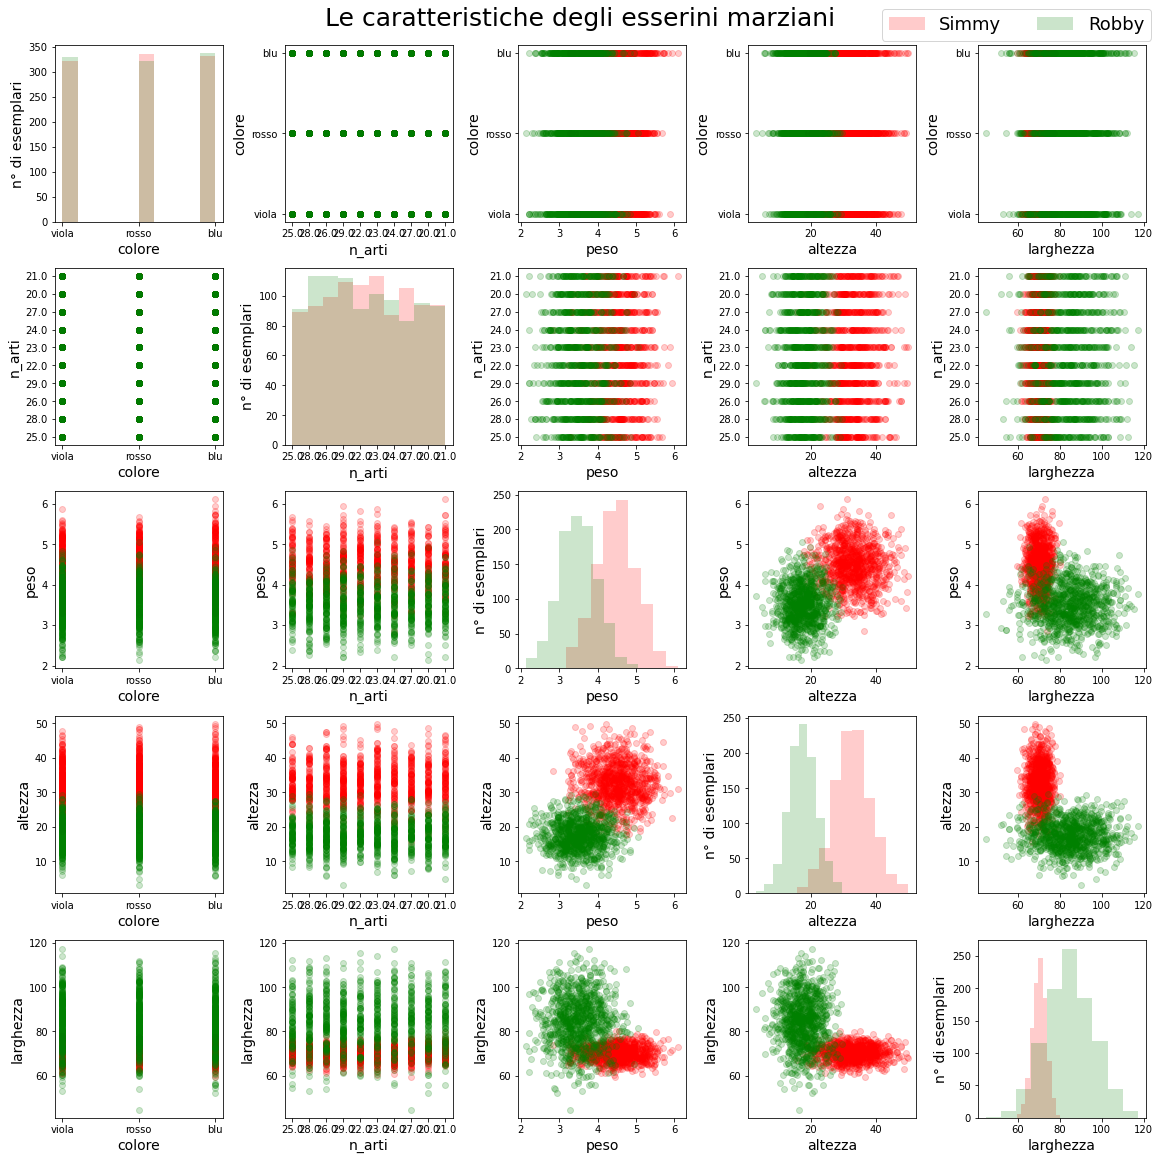

In [8]:
caratteristiche = ['colore', 'n_arti', 'peso', 'altezza', 'larghezza']
n = len(caratteristiche)
fig, axs = pl.subplots(n, n, figsize=(16,16), constrained_layout=True)
for j, dato_y in enumerate(caratteristiche): #scorre indice e contenuto
    for i, dato_x in enumerate(caratteristiche):
        maschera_simmy = dictionary['tipo']=="Simmy"
        maschera_robby = dictionary['tipo']=="Robby"
        if i!=j:
            axs[j,i].scatter(dictionary[dato_x][maschera_simmy], 
                       dictionary[dato_y][maschera_simmy], c="r", label="Simmy", alpha = 0.2)
            axs[j,i].scatter(dictionary[dato_x][maschera_robby], 
                       dictionary[dato_y][maschera_robby], c="g", label="Robby", alpha = 0.2)
            axs[j,i].set_xlabel(dato_x, fontsize=14)
            axs[j,i].set_ylabel(dato_y, fontsize=14)
        else:
            axs[j,i].hist(dictionary[dato_x][maschera_simmy], bins=10,
                        color="r", label="Simmy", alpha=0.2)
            axs[j,i].hist(dictionary[dato_x][maschera_robby], bins=10,
                        color="g", label="Robby", alpha=0.2)
            axs[j,i].set_xlabel(dato_x, fontsize=14)
            axs[j,i].set_ylabel("n° di esemplari", fontsize=14)
    
fig.suptitle('Le caratteristiche degli esserini marziani', fontsize=25)
fig.legend(labels=["Simmy","Robby"], ncol=2, fontsize=18)
pl.show()